#### TELECOM CHURN MANAGEMENT - SEGMENTATION - CLASIFICATION - BUILDING THE MODEL

### STEP 1 - Importing Libraries and data and scaning the merged data

In [14]:
import pandas as pd
import numpy as np

In [15]:
# Load the data
telecom_active = pd.read_csv("telecom_active_cleaned.csv")
telecom_churn = pd.read_csv("telecom_churn_cleaned.csv")

In [16]:
telecom_active = telecom_active.fillna('NA')
telecom_churn = telecom_churn.fillna('NA')

In [17]:
frames = [telecom_active, telecom_churn]
telecom_data = pd.concat(frames)

In [18]:
telecom_data.columns

Index([u'SITE_ACCOUNT_NUMBER', u'SALES_CHANNEL', u'DIRECT_INDIRECT_CHANNEL',
       u'FEEDBACK', u'SITE_TYPE_DESC', u'GENDER', u'AGE', u'INCOME',
       u'MARITAL_STATUS', u'PRESENCE_OF_CHILDREN', u'COMPUTER_OWNER',
       u'SERVICE_PLAN_CAT', u'MODEL_CAT', u'MOST_RECENT_SALES_CHANNEL_CAT',
       u'SATELLITE_CAT', u'WARRANTY_NAME_CAT', u'CHURN_IND', u'UPGRADE_IND'],
      dtype='object')

In [19]:
telecom_data.head()

,SITE_ACCOUNT_NUMBER,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_CAT,MODEL_CAT,MOST_RECENT_SALES_CHANNEL_CAT,SATELLITE_CAT,WARRANTY_NAME_CAT,CHURN_IND,UPGRADE_IND
0,AMR-11112345,Vars,Indirect,NA,Broadband Remote,2,69,0,1,0,N,NA,HN9000,HN7K Upgrade,SPACEWAY3,NA,0,1
1,AMR-14837287,Sales Agents,Indirect,GOOD,Spaceway,2,43,4,1,0,N,Pro,HN7000S,Retail,HZN-VER-SERIES,NA,0,1
2,AMR-14837803,Call Center,Indirect,BAD,Broadband Remote,2,58,4,1,0,N,Power150,HN9000,National Sales,SM5-VER-SERIES,NA,0,1
3,AMR-14837821,Sales Agents,Direct,NA,Spaceway,9,22,6,1,1,NA,Power150,DW6000,Direct,SPACEWAY3,NA,0,1
4,AMR-14839297,Call Center,Indirect,GOOD,Broadband Remote,1,36,7,0,0,NA,Home,HN7000S,DW6K Upgrade,NA,NA,0,1


In [20]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 9999
Data columns (total 18 columns):
SITE_ACCOUNT_NUMBER              19998 non-null object
SALES_CHANNEL                    19998 non-null object
DIRECT_INDIRECT_CHANNEL          19998 non-null object
FEEDBACK                         19998 non-null object
SITE_TYPE_DESC                   19998 non-null object
GENDER                           19998 non-null int64
AGE                              19998 non-null int64
INCOME                           19998 non-null object
MARITAL_STATUS                   19998 non-null int64
PRESENCE_OF_CHILDREN             19998 non-null int64
COMPUTER_OWNER                   19998 non-null object
SERVICE_PLAN_CAT                 19998 non-null object
MODEL_CAT                        19998 non-null object
MOST_RECENT_SALES_CHANNEL_CAT    19998 non-null object
SATELLITE_CAT                    19998 non-null object
WARRANTY_NAME_CAT                19998 non-null object
CHURN_IND       

In [21]:
telecom_data.isnull().any()

SITE_ACCOUNT_NUMBER              False
SALES_CHANNEL                    False
DIRECT_INDIRECT_CHANNEL          False
FEEDBACK                         False
SITE_TYPE_DESC                   False
GENDER                           False
AGE                              False
INCOME                           False
MARITAL_STATUS                   False
PRESENCE_OF_CHILDREN             False
COMPUTER_OWNER                   False
SERVICE_PLAN_CAT                 False
MODEL_CAT                        False
MOST_RECENT_SALES_CHANNEL_CAT    False
SATELLITE_CAT                    False
WARRANTY_NAME_CAT                False
CHURN_IND                        False
UPGRADE_IND                      False
dtype: bool

The summary statistics for numerical varibales

In [22]:
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,19998.0,2.390889,2.546084,1.0,1.0,2.0,2.0,9.0
AGE,19998.0,46.688119,14.205702,0.0,35.0,47.0,58.0,92.0
MARITAL_STATUS,19998.0,2.240774,3.392007,0.0,0.0,1.0,1.0,9.0
PRESENCE_OF_CHILDREN,19998.0,1.423292,2.938790,0.0,0.0,0.0,1.0,9.0
CHURN_IND,19998.0,0.500050,0.500012,0.0,0.0,1.0,1.0,1.0
UPGRADE_IND,19998.0,0.956046,0.204999,0.0,1.0,1.0,1.0,1.0


### STEP 2 - Encoding and preparting the data for model creation

    Since we have multiple categorical varibles - creating dummies will cause un-managable increase in columns
    So I am Encoding Categorical Features to have a managable datasize

In [23]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

telecom_data['SALES_CHANNEL_EN'] = encoder.fit_transform(telecom_data['SALES_CHANNEL'])
telecom_data['DIRECT_INDIRECT_CHANNEL_EN'] = encoder.fit_transform(telecom_data['DIRECT_INDIRECT_CHANNEL'])
telecom_data['FEEDBACK_EN'] = encoder.fit_transform(telecom_data['FEEDBACK'])
telecom_data['SITE_TYPE_DESC_EN'] = encoder.fit_transform(telecom_data['SITE_TYPE_DESC'])
telecom_data['INCOME_EN'] = encoder.fit_transform(telecom_data['INCOME'])
telecom_data['COMPUTER_OWNER_EN'] = encoder.fit_transform(telecom_data['COMPUTER_OWNER'])
telecom_data['SERVICE_PLAN_CAT_EN'] = encoder.fit_transform(telecom_data['SERVICE_PLAN_CAT'])
telecom_data['MODEL_CAT_EN'] = encoder.fit_transform(telecom_data['MODEL_CAT'])
telecom_data['MOST_RECENT_SALES_CHANNEL_CAT_EN'] = encoder.fit_transform(telecom_data['MOST_RECENT_SALES_CHANNEL_CAT'])
telecom_data['SATELLITE_CAT_EN'] = encoder.fit_transform(telecom_data['SATELLITE_CAT'])
telecom_data['WARRANTY_NAME_CAT_EN'] = encoder.fit_transform(telecom_data['WARRANTY_NAME_CAT'])

In [24]:
df_telecom = telecom_data.select_dtypes(include=['int64']).copy()

In [25]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 9999
Data columns (total 17 columns):
GENDER                              19998 non-null int64
AGE                                 19998 non-null int64
MARITAL_STATUS                      19998 non-null int64
PRESENCE_OF_CHILDREN                19998 non-null int64
CHURN_IND                           19998 non-null int64
UPGRADE_IND                         19998 non-null int64
SALES_CHANNEL_EN                    19998 non-null int64
DIRECT_INDIRECT_CHANNEL_EN          19998 non-null int64
FEEDBACK_EN                         19998 non-null int64
SITE_TYPE_DESC_EN                   19998 non-null int64
INCOME_EN                           19998 non-null int64
COMPUTER_OWNER_EN                   19998 non-null int64
SERVICE_PLAN_CAT_EN                 19998 non-null int64
MODEL_CAT_EN                        19998 non-null int64
MOST_RECENT_SALES_CHANNEL_CAT_EN    19998 non-null int64
SATELLITE_CAT_EN                    1

In [26]:
df_telecom.head()

,GENDER,AGE,MARITAL_STATUS,PRESENCE_OF_CHILDREN,CHURN_IND,UPGRADE_IND,SALES_CHANNEL_EN,DIRECT_INDIRECT_CHANNEL_EN,FEEDBACK_EN,SITE_TYPE_DESC_EN,INCOME_EN,COMPUTER_OWNER_EN,SERVICE_PLAN_CAT_EN,MODEL_CAT_EN,MOST_RECENT_SALES_CHANNEL_CAT_EN,SATELLITE_CAT_EN,WARRANTY_NAME_CAT_EN
0,2,69,1,0,0,1,6,1,2,1,0,0,4,5,11,11,7
1,2,43,1,0,0,1,5,1,1,3,4,0,7,4,16,5,7
2,2,58,1,0,0,1,0,1,0,1,4,0,6,5,15,8,7
3,9,22,1,1,0,1,5,0,2,3,6,1,6,2,8,11,7
4,1,36,0,0,0,1,0,1,1,1,7,1,3,4,3,6,7


### STEP 3 - Creating the model and getting churn probability

In [58]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [40]:
#Splitting the data
feature_columns = df_telecom.columns.difference( ['CHURN_IND'] )

In [41]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( df_telecom[feature_columns],
                                                  df_telecom['CHURN_IND'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [42]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('AGE', 0.031867468501663811),
 ('COMPUTER_OWNER_EN', 0.96645702225910501),
 ('DIRECT_INDIRECT_CHANNEL_EN', 0.092224252894087422),
 ('FEEDBACK_EN', -0.31852081735217214),
 ('GENDER', -0.015901766783318609),
 ('INCOME_EN', 0.07966007975412677),
 ('MARITAL_STATUS', 0.3544450347159897),
 ('MODEL_CAT_EN', -0.20444713143422227),
 ('MOST_RECENT_SALES_CHANNEL_CAT_EN', 0.10307499822974435),
 ('PRESENCE_OF_CHILDREN', 0.036075265997232854),
 ('SALES_CHANNEL_EN', -0.039368052900834477),
 ('SATELLITE_CAT_EN', 0.031958854698193602),
 ('SERVICE_PLAN_CAT_EN', 0.052137046456303203),
 ('SITE_TYPE_DESC_EN', 0.89629163344295959),
 ('UPGRADE_IND', -4.2815867991507703),
 ('WARRANTY_NAME_CAT_EN', -0.42558101083167793)]

In [44]:
logreg.intercept_

array([ 1.76037815])

In [45]:
#Predicting on train dataset
tele_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_X ) } )

In [46]:
score = metrics.accuracy_score( tele_train_pred.actual, tele_train_pred.predicted )
round( float(score), 2 )

0.83

In [47]:
#Predicting on test data
tele_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [48]:
tele_test_pred = tele_test_pred.reset_index()

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [50]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( tele_test_pred.actual,
                            tele_test_pred.predicted, [1,0] )
cm

array([[1583,  443],
       [ 303, 1671]], dtype=int64)

Text(0.5,15,u'Predicted label')

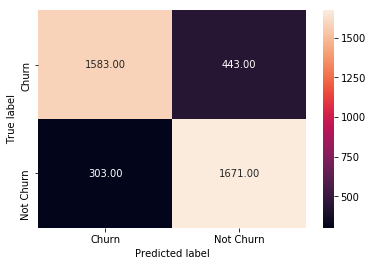

In [51]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
score = metrics.accuracy_score( tele_test_pred.actual, tele_test_pred.predicted )
round( float(score), 2 )

0.81

    Overall train accuracy is 83% and Test accuracy is 81%
    We are looking to enhance the accuracy using Grid Search to Fine Tune the parameters

##### Fine Tuning the parameters

In [53]:
param_grid = {'max_depth': np.arange(3, 16),
             'max_features': np.arange(3,8)}

In [54]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': array([3, 4, 5, 6, 7]), 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [55]:
tree.best_params_

{'max_depth': 15, 'max_features': 7}

In [56]:
tree.best_score_

0.9302412801600201

### Building Final Decision Tree Model based on best parameters

In [59]:
train_X.head()

,AGE,COMPUTER_OWNER_EN,DIRECT_INDIRECT_CHANNEL_EN,FEEDBACK_EN,GENDER,INCOME_EN,MARITAL_STATUS,MODEL_CAT_EN,MOST_RECENT_SALES_CHANNEL_CAT_EN,PRESENCE_OF_CHILDREN,SALES_CHANNEL_EN,SATELLITE_CAT_EN,SERVICE_PLAN_CAT_EN,SITE_TYPE_DESC_EN,UPGRADE_IND,WARRANTY_NAME_CAT_EN
1870,70,2,1,0,1,8,9,2,8,0,3,0,11,3,1,1
1323,68,1,0,1,1,13,0,4,8,0,3,2,8,1,1,6
5749,28,0,1,1,1,13,1,4,3,1,5,1,1,1,1,7
1688,55,0,1,1,2,9,1,4,2,0,5,2,10,1,1,7
6834,42,1,1,2,2,0,0,4,16,9,4,2,6,1,1,7


In [60]:
clf_tree = DecisionTreeClassifier( max_depth = 15, max_features=7 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

    Prediction Accuracy on Train Dataset

In [61]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [62]:
tree_train_pred.sample( n = 10 )

,actual,predicted
9165,0,1
848,0,0
5308,1,1
2334,1,1
5934,1,1
4186,0,0
6323,0,0
2663,1,1
5868,0,0
9850,0,0


In [63]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.97355919489936238

    Prediction Accuracy on Test Dataset

In [64]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [65]:
tree_test_pred.sample( n = 10 )

,actual,predicted
2045,0,0
3860,0,0
3352,0,0
820,1,1
1624,1,1
1731,0,1
4410,0,0
109,1,1
3519,1,1
1272,0,0


In [66]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.93149999999999999

Text(0.5,15,u'Predicted label')

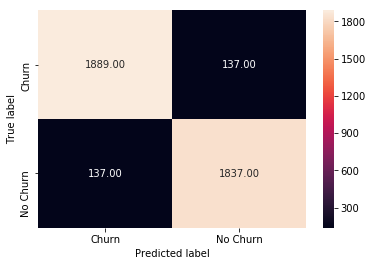

In [68]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "No Churn"] , yticklabels = ["Churn", "No Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

    We get a train accuracy of 97% and test accuracy of 93%

### BUILDING RANDOM FOREST MODEL

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=30,max_depth = 15, max_features=7 )
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [190]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_X ) } )

In [191]:
metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted )

0.98574821852731587

Text(0.5,15,u'Predicted label')

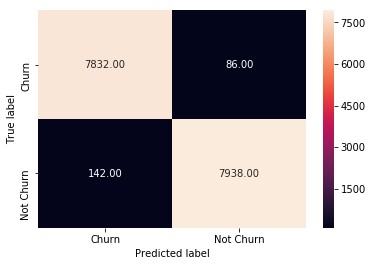

In [192]:
tree_cm_tr = metrics.confusion_matrix( radm_train_pred.predicted,
                                 radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm_tr, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [193]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [194]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.95825000000000005

Text(0.5,15,u'Predicted label')

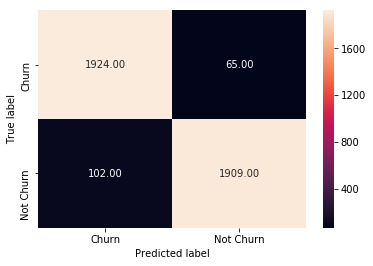

In [195]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

    We get a train accuracy of 98% and test accuracy of 96%

### USING RANDOM FOREST MODEL TO GET THE PROBABILITY OF CHURN FOR ACTIVE CUSTOMERS

    ENCODING THE ACTIVE CUSTOMERS (df_telecom_active)

In [196]:
telecom_active['SALES_CHANNEL_EN'] = encoder.fit_transform(telecom_active['SALES_CHANNEL'])
telecom_active['DIRECT_INDIRECT_CHANNEL_EN'] = encoder.fit_transform(telecom_active['DIRECT_INDIRECT_CHANNEL'])
telecom_active['FEEDBACK_EN'] = encoder.fit_transform(telecom_active['FEEDBACK'])
telecom_active['SITE_TYPE_DESC_EN'] = encoder.fit_transform(telecom_active['SITE_TYPE_DESC'])
telecom_active['INCOME_EN'] = encoder.fit_transform(telecom_active['INCOME'])
telecom_active['COMPUTER_OWNER_EN'] = encoder.fit_transform(telecom_active['COMPUTER_OWNER'])
telecom_active['SERVICE_PLAN_CAT_EN'] = encoder.fit_transform(telecom_active['SERVICE_PLAN_CAT'])
telecom_active['MODEL_CAT_EN'] = encoder.fit_transform(telecom_active['MODEL_CAT'])
telecom_active['MOST_RECENT_SALES_CHANNEL_CAT_EN'] = encoder.fit_transform(telecom_active['MOST_RECENT_SALES_CHANNEL_CAT'])
telecom_active['SATELLITE_CAT_EN'] = encoder.fit_transform(telecom_active['SATELLITE_CAT'])
telecom_active['WARRANTY_NAME_CAT_EN'] = encoder.fit_transform(telecom_active['WARRANTY_NAME_CAT'])

In [197]:
df_telecom_active = telecom_active.select_dtypes(include=['int64']).copy()

In [198]:
df_test  = df_telecom_active.copy()

In [199]:
df_test.head()

,GENDER,AGE,MARITAL_STATUS,PRESENCE_OF_CHILDREN,CHURN_IND,UPGRADE_IND,SALES_CHANNEL_EN,DIRECT_INDIRECT_CHANNEL_EN,FEEDBACK_EN,SITE_TYPE_DESC_EN,INCOME_EN,COMPUTER_OWNER_EN,SERVICE_PLAN_CAT_EN,MODEL_CAT_EN,MOST_RECENT_SALES_CHANNEL_CAT_EN,SATELLITE_CAT_EN,WARRANTY_NAME_CAT_EN
0,2,69,1,0,0,1,4,1,2,1,0,0,4,5,8,11,6
1,2,43,1,0,0,1,3,1,1,2,4,0,6,4,12,5,6
2,2,58,1,0,0,1,0,1,0,1,4,0,5,5,11,8,6
3,9,22,1,1,0,1,3,0,2,2,6,1,5,2,7,11,6
4,1,36,0,0,0,1,0,1,1,1,7,1,3,4,3,6,6


In [200]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 17 columns):
GENDER                              9998 non-null int64
AGE                                 9998 non-null int64
MARITAL_STATUS                      9998 non-null int64
PRESENCE_OF_CHILDREN                9998 non-null int64
CHURN_IND                           9998 non-null int64
UPGRADE_IND                         9998 non-null int64
SALES_CHANNEL_EN                    9998 non-null int64
DIRECT_INDIRECT_CHANNEL_EN          9998 non-null int64
FEEDBACK_EN                         9998 non-null int64
SITE_TYPE_DESC_EN                   9998 non-null int64
INCOME_EN                           9998 non-null int64
COMPUTER_OWNER_EN                   9998 non-null int64
SERVICE_PLAN_CAT_EN                 9998 non-null int64
MODEL_CAT_EN                        9998 non-null int64
MOST_RECENT_SALES_CHANNEL_CAT_EN    9998 non-null int64
SATELLITE_CAT_EN                    9998 non-null int

In [201]:
features = train_X.columns

    Make predictions on test (active) dataset - to get the churn probabilities of active customers
    - Accuracy 93%

In [202]:
predictions = radm_clf.predict(df_test[features])
probs = radm_clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [203]:
score = clf.score(df_test[features], df_test["CHURN_IND"])
print("Accuracy: ", score)

('Accuracy: ', 0.93108621724344864)


In [204]:
df_test["prob_true"] = probs[:, 1]

Taking out the PROBABILITY COLUMN and adding to the main dataset

In [205]:
df_prob = df_test["prob_true"]

In [206]:
df_prob.head()

0    0.487598
1    0.215775
2    0.034921
3    0.500000
4    0.065662
Name: prob_true, dtype: float64

    Adding the raw data with the churn prob (prob of true)

In [261]:
telecom_active_raw = pd.read_csv("telecom_active.csv")

In [262]:
df_telecom = pd.concat([telecom_active_raw, df_prob], axis=1)

In [263]:
df_telecom.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,prob_true
0,AMR-11112345,Active,27-11-2001,14-12-2003,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,NaN,HN7000 Upgrade,2.0,01-05-1943,69,0,1,0,N,0.487598
1,AMR-14837287,Active,02-05-2003,08-08-2006,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,NaN,Retail,2.0,28-12-1969,43,4,1,0,N,0.215775
2,AMR-14837803,Active,28-01-2001,17-03-2004,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,NaN,National Sales,2.0,20-07-1954,58,4,1,0,N,0.034921
3,AMR-14837821,Active,20-11-2001,27-03-2005,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,NaN,Direct,NaN,10-05-1990,22,6,1,1,NaN,0.500000
4,AMR-14839297,Active,27-02-2002,14-06-2004,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,NaN,DW6000 Upgrade,1.0,11-05-1976,36,7,0,0,NaN,0.065662


#### CHURN SEGMENTATION -
    0 - 0.3   - LOW CHURN PROBABILITY
    0.3 - 0.7 - MEDIUM CHURN PROBABILITY
    0.7 - 1   - HIGH CHURN PROBABILITY
   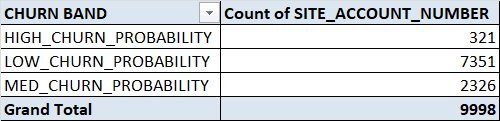

In [264]:
def churntyp(df_telecom):
    if ((df_telecom.prob_true  >= 0.0) & (df_telecom.prob_true <= 0.3)):
        return 'LOW_CHURN_PROBABILITY'
    elif ((df_telecom.prob_true  > 0.3) & (df_telecom.prob_true <= 0.7)):
        return 'MED_CHURN_PROBABILITY'
    else:
        return 'HIGH_CHURN_PROBABILITY'

In [265]:
df_telecom['CHURN_BAND'] = df_telecom.apply(churntyp, axis=1)

In [266]:
df_telecom.to_csv("TELECOM_ACTIVE_CUSTOMER_WITH_PROB.csv")

In [267]:
pd.pivot_table(df_telecom,index=["CHURN_BAND"],values=["SITE_ACCOUNT_NUMBER"],aggfunc='count')

,SITE_ACCOUNT_NUMBER
CHURN_BAND,
HIGH_CHURN_PROBABILITY,321
LOW_CHURN_PROBABILITY,7351
MED_CHURN_PROBABILITY,2326


### Feature importance from the Random Forest Model

In [216]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

<b> Note: </b>
As per the model, the most important features which influence whether the subscriber will CHURN,in descending order, are

,importance,labels
8,0.185079,MOST_RECENT_SALES_CHANNEL_CAT_EN
6,0.144112,MARITAL_STATUS
13,0.122697,SITE_TYPE_DESC_EN
11,0.117031,SATELLITE_CAT_EN
15,0.092520,WARRANTY_NAME_CAT_EN
10,0.072289,SALES_CHANNEL_EN
1,0.053504,COMPUTER_OWNER_EN
3,0.047651,FEEDBACK_EN
5,0.044230,INCOME_EN
7,0.036434,MODEL_CAT_EN


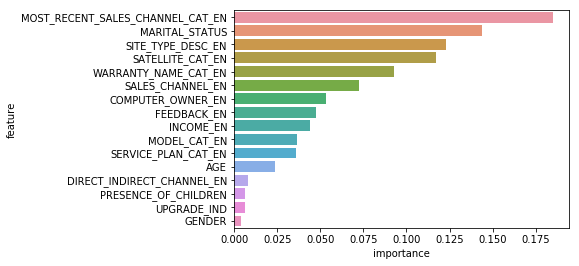

In [217]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )


df_f = pd.DataFrame(radm_clf.feature_importances_, columns=["importance"])
df_f["labels"] = feature_columns
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f)



for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

    **************************************** THANK YOU *************************************************